In [1]:
import numpy as np
import librosa.display
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr, cmap='gray')

    fig.savefig(image_file)
    plt.close(fig)

def create_full_spectrogram(audio_file, image_file):
    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    # plt.figure(figsize=(10, 4))  # Adjust the figure size as needed
    librosa.display.specshow(log_ms, sr=sr, x_axis='time', y_axis='mel', cmap='gray')
    plt.savefig(image_file)
    plt.close()

    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        try:
            input_file = os.path.join(input_path, file)
            output_file = os.path.join(output_path, file.replace('.wav', '.png'))
            create_full_spectrogram(input_file, output_file)
        except Exception as e:
            print(e)
            print('error in ' + file)    

In [ ]:
import os
for i in os.listdir('train_sound'):
    os.mkdir('spectrograms/'+ i[0:3])


error in .DS_Store

error in .DS_Store


KeyboardInterrupt: 

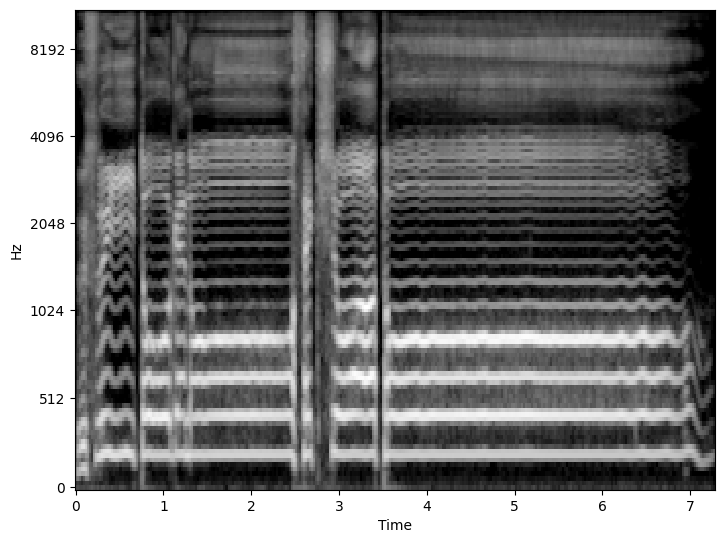

In [208]:
import os
import warnings
warnings.filterwarnings('ignore')

# print(len(os.listdir('train_sound/')))

for i in range(len(os.listdir('train_sound/'))):
    create_pngs_from_wavs('train_sound/', 'spectrograms/')

In [238]:
create_pngs_from_wavs('combinedaudio/', 'spectrograms/test/')

In [239]:


path = 'spectrograms/test/'
file = 'E27_E36_E37'
# new_combined_sound = image.img_to_array(image.load_img(os.path.join(path, file)+'.png', target_size=(224, 224, 1)))
new_combined_sound = image.img_to_array(image.load_img(os.path.join(path, file)+'.png'))

print(new_combined_sound.shape)

(480, 640, 3)


In [2]:
file_label = {}

with open('file_labels.csv', mode='r', encoding='utf-8-sig') as fp:
    for line in fp:
        file, label = line.strip().split(',')
        file_label[file] = int(label)
    fp.close()

print(file_label)

{'E01': 0, 'E02': 1, 'E03': 2, 'E04': 3, 'E05': 4, 'E06': 5, 'E07': 6, 'E08': 7, 'E09': 8, 'E10': 9, 'E11': 10, 'E12': 11, 'E13': 12, 'E14': 13, 'E15': 14, 'E16': 15, 'E17': 16, 'E18': 17, 'E19': 18, 'E20': 19, 'E21': 20, 'E22': 21, 'E23': 22, 'E24': 23, 'E25': 24, 'E26': 25, 'E27': 26, 'E28': 27, 'E29': 28, 'E30': 29, 'E31': 30, 'E32': 31, 'E33': 32, 'E34': 33, 'E35': 34, 'E36': 35, 'E37': 36, 'E38': 37, 'E39': 38, 'E40': 39, 'E41': 40, 'E42': 41, 'E43': 42, 'E44': 43, 'J01': 44, 'J02': 45, 'J03': 46, 'J04': 47, 'J05': 48, 'J06': 49, 'J07': 50, 'J08': 51, 'J09': 52, 'J10': 53, 'J11': 54, 'J12': 55, 'J13': 56, 'J14': 57, 'J15': 58, 'J16': 59, 'J17': 60, 'J18': 61, 'J19': 62, 'J20': 63, 'J21': 64, 'J22': 65, 'J23': 66, 'J24': 67, 'J25': 68, 'J26': 69, 'J27': 70, 'J28': 71, 'J29': 72, 'J30': 73, 'J31': 74, 'J32': 75, 'J33': 76, 'J34': 77, 'J35': 78, 'J36': 79, 'J37': 80, 'J38': 81, 'J39': 82, 'J40': 83, 'J41': 84, 'J42': 85, 'J43': 86, 'J44': 87}


In [3]:
from keras.preprocessing import image

def load_images_from_path(path, label):
    images = []
    labels = []

    for file in os.listdir(path):
        # images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 1))))
        images.append(image.img_to_array(image.load_img(os.path.join(path, file))))
        labels.append((label))
        
    return images, labels

def load_images_from_name(path):
    images = []
    labels = []

    for file, j in file_label.items():
        # images.append(image.img_to_array(image.load_img(os.path.join(path, file)+'.png', target_size=(224, 224, 1))))
        images.append(image.img_to_array(image.load_img(os.path.join(path, file)+'.png')))
        labels.append((j))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)


In [4]:
x = []
y = []

images, labels = load_images_from_name('spectrograms/')
# show_images(images)

x += images
y += labels
print(y)
x = np.array(x)
y = np.array(y)
# # print(x, y)
print(x.shape)
print(y.shape)
# print(len(x))
# print(len(y))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87]
(88, 480, 640, 3)
(88,)


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# path = 'spectrograms/test/'
# file = 'problem'
# new_combined_sound = image.img_to_array(image.load_img(os.path.join(path, file)+'.png', target_size=(480, 640, 1)))

one_hot_labels = to_categorical(y, num_classes=88)
# Define your CNN model
model = keras.Sequential([
    # layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(480, 640, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(88, activation='sigmoid')  # 88 output units with sigmoid activation
])
# Compile the model
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            # loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
# model.summary()
# Assuming you have prepared your data as train_sounds (combined sounds), 
# and you have labels for each combined sound indicating which uncombined sounds are present.
# Train the model
model.fit(x,one_hot_labels, epochs=10, validation_split=0.2, batch_size=32)
# To make predictions on new combined sounds, you can use model.predict() to determine which uncombined sounds are present in a mixture.
# Example:
# Load and preprocess your new combined sound
# predictions = model.predict(new_combined_sound)
# 'predictions' will be a probability distribution over the uncombined sounds, indicating the likelihood of each sound being present in the mixture.

Epoch 1/10
3/3 [==============================] - 13s 3s/step - loss: 511.6975 - accuracy: 0.0143 - val_loss: 243.0039 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 13s 4s/step - loss: 172.1114 - accuracy: 0.0143 - val_loss: 53.4930 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 15s 4s/step - loss: 32.8617 - accuracy: 0.0143 - val_loss: 11.3501 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 11s 3s/step - loss: 6.1166 - accuracy: 0.0286 - val_loss: 1.3817 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 10s 3s/step - loss: 0.6575 - accuracy: 0.0857 - val_loss: 0.5294 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 11s 3s/step - loss: 0.2731 - accuracy: 0.0857 - val_loss: 0.2728 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 11s 3s/step - loss: 0.1602 - accuracy: 0.1714 - val_loss: 0.1980 - val_accuracy: 0.0000e+

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image and resize it to the desired shape
new_combined_sound = image.load_img("spectrograms/J01.png", target_size=(480, 640, 3))
# new_combined_sound = image.load_img("spectrograms/E40.png")
img_array = image.img_to_array(new_combined_sound)
img_array = np.expand_dims(img_array, axis=0) 

In [7]:
num_sounds = 10

In [8]:
predictions = model.predict(img_array)
# Sort the predictions to find the top N most likely sounds
top_n_indices = np.argsort(predictions[0])[::-1][:num_sounds]

# Display the top N most likely sounds
print(f"The {num_sounds} most likely sounds are:")
for i, index in enumerate(top_n_indices):
    sound_label = y[index]
    probability = predictions[0][index]
    print(f"{i + 1}. {sound_label} (Probability: {probability:.2f})")

1/1 [==============================] - 0s 150ms/step
The 10 most likely sounds are:
1. 44 (Probability: 0.63)
2. 41 (Probability: 0.28)
3. 46 (Probability: 0.27)
4. 2 (Probability: 0.25)
5. 33 (Probability: 0.24)
6. 60 (Probability: 0.23)
7. 28 (Probability: 0.22)
8. 42 (Probability: 0.20)
9. 48 (Probability: 0.16)
10. 38 (Probability: 0.16)


In [ ]:

# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Restrict TensorFlow to only allocate a specific fraction of GPU memory
#         tf.config.experimental.set_virtual_device_configuration(
#             gpus[0],
#             [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)])  # Adjust the memory limit as needed
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         print(e)